In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as s



In [2]:
header_list = ["id_mutation",'date_mutation','numero_disposition','nature_mutation','valeur_fonciere','adresse_numero','adresse_suffixe','adresse_nom_voie','adresse_code_voie','code_postal','code_commune','nom_commune','code_departement','ancien_code_commune','ancien_nom_commune','id_parcelle','ancien_id_parcelle','numero_volume','lot1_numero','lot1_surface_carrez','lot2_numero','lot2_surface_carrez','lot3_numero','lot3_surface_carrez','lot4_numero','lot4_surface_carrez','lot5_numero','lot5_surface_carrez','nombre_lots','code_type_local','type_local','surface_reelle_bati','nombre_pieces_principales','code_nature_culture','nature_culture','code_nature_culture_speciale','nature_culture_speciale','surface_terrain','longitude','latitude','section_prefixe']

In [3]:
### On teste header list sur 76575_000AB

In [4]:
df = pd.read_csv('76575_000AB.csv',sep = ';' ,names=header_list)
#print(df.to_string())
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
3,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,0040,76800,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB


### 1- Combiner tout les fichiers CSV

In [5]:
#On liste tous les fichiers csv qu'on a
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['76575_000AB.csv',
 '76575_000AC.csv',
 '76575_000AD.csv',
 '76575_000AE.csv',
 '76575_000AH.csv',
 '76575_000AI.csv',
 '76575_000AK.csv',
 '76575_000AL.csv',
 '76575_000AM.csv',
 '76575_000AO.csv',
 '76575_000AP.csv',
 '76575_000AR.csv',
 '76575_000AS.csv',
 '76575_000AT.csv',
 '76575_000AV.csv',
 '76575_000AW.csv',
 '76575_000AX.csv',
 '76575_000AY.csv',
 '76575_000AZ.csv',
 '76575_000BC.csv',
 '76575_000BD.csv',
 '76575_000BE.csv',
 '76575_000BH.csv',
 '76575_000BK.csv',
 '76575_000BL.csv',
 '76575_000BM.csv',
 '76575_000BN.csv',
 '76575_000BO.csv',
 '76575_000BP.csv',
 '76575_000BR.csv',
 '76575_000BS.csv',
 '76575_000BT.csv',
 '76575_000BV.csv',
 '76575_000BW.csv']

In [6]:
df_concat = pd.concat([pd.read_csv(f,sep = ';' ,names=header_list) for f in csv_files ], ignore_index=True)
df_concat

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
3,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,0040,76800,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,...,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW
3002,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
3003,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
3004,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW


In [7]:
df_concat.shape

(3006, 41)

In [8]:
###On supprime les lignes qui montre la distribution des collones
df_concat.drop(df_concat[df_concat['valeur_fonciere'] =='valeur_fonciere'].index, inplace = True)
df_concat.shape

(2972, 41)

In [9]:
df_concat

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,0582,76800,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
3,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,0040,76800,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
5,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,...,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW
3002,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
3003,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
3004,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW


In [10]:
###Convertir les types de local en numero
df_concat["type_local"]=df_concat["type_local"].map({'Appartement': 2, "Maison": 1 ,'Dépendance':3 ,'Local industriel. commercial ou assimilé' :4 })

### 2-Cleaning dataset and reducing dimentions

In [11]:
df_concat.describe()

,type_local
count,2199.000000
mean,1.907231
std,1.008399
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [12]:
###Convertir None to nan afin de la détecter 
df_concat = df_concat.replace(to_replace='None', value=np.nan)


1- On va chercher s'il y'a des colonnes avec des valeurs Null

In [13]:
### Combien de valeur nul on a dans chaque colonne
df_concat.isnull().sum()

id_mutation                        0
date_mutation                      0
numero_disposition                 0
nature_mutation                    0
valeur_fonciere                   50
adresse_numero                   485
adresse_suffixe                 2855
adresse_nom_voie                  15
adresse_code_voie                 15
code_postal                       15
code_commune                       0
nom_commune                        0
code_departement                   0
ancien_code_commune             2972
ancien_nom_commune              2972
id_parcelle                        0
ancien_id_parcelle              2972
numero_volume                   2966
lot1_numero                     2525
lot1_surface_carrez             2808
lot2_numero                     2809
lot2_surface_carrez             2938
lot3_numero                     2910
lot3_surface_carrez             2962
lot4_numero                     2968
lot4_surface_carrez             2972
lot5_numero                     2968
l

In [14]:
### Le pourcentage des valeur nul qu'on a dans chaque colonne
df_concat.isnull().sum()*100/df_concat.shape[0]

id_mutation                       0.000000
date_mutation                     0.000000
numero_disposition                0.000000
nature_mutation                   0.000000
valeur_fonciere                   1.682369
adresse_numero                   16.318977
adresse_suffixe                  96.063257
adresse_nom_voie                  0.504711
adresse_code_voie                 0.504711
code_postal                       0.504711
code_commune                      0.000000
nom_commune                       0.000000
code_departement                  0.000000
ancien_code_commune             100.000000
ancien_nom_commune              100.000000
id_parcelle                       0.000000
ancien_id_parcelle              100.000000
numero_volume                    99.798116
lot1_numero                      84.959623
lot1_surface_carrez              94.481830
lot2_numero                      94.515478
lot2_surface_carrez              98.855989
lot3_numero                      97.913863
lot3_surfac

Notre décision donc est de supprimer tous les colonnes qui ont des valeurs nuls. 

In [15]:
###On commence par supprimer les colonnes qui ont des valeurs nuls
List = ['adresse_suffixe','adresse_nom_voie','adresse_code_voie','code_postal','ancien_code_commune','ancien_nom_commune','ancien_id_parcelle','numero_volume','lot1_surface_carrez','lot1_numero','lot2_numero','lot2_surface_carrez','lot3_surface_carrez','lot3_numero','lot4_numero','lot4_surface_carrez','lot5_numero','lot5_surface_carrez','code_type_local','code_nature_culture','nature_culture','code_nature_culture_speciale','nature_culture_speciale']
for i in List:
    df_concat.drop(i, inplace=True, axis=1)

In [16]:
df_concat.shape

(2972, 18)

In [17]:
### Collone qui reste
df_concat.iloc[0][:]

id_mutation                               2022-360375
date_mutation                              2022-04-21
numero_disposition                                  1
nature_mutation                                 Vente
valeur_fonciere                              260000.0
adresse_numero                                   26.0
code_commune                                    76575
nom_commune                  Saint-Étienne-du-Rouvray
code_departement                                   76
id_parcelle                            76575000AB0065
nombre_lots                                         0
type_local                                        1.0
surface_reelle_bati                             129.0
nombre_pieces_principales                         4.0
surface_terrain                                 351.0
longitude                                    1.071855
latitude                                    49.401886
section_prefixe                                 000AB
Name: 1, dtype: object

In [18]:
df_concat.describe()

,type_local
count,2199.000000
mean,1.907231
std,1.008399
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [19]:
#On passe maintenant à supprimer les caractéristiques non null mais qui n'influence pas le prix de la maison(d'apres la logique et aussi la correlation)
List2 = ['id_mutation','date_mutation','numero_disposition','nature_mutation','code_commune','nom_commune','code_departement','id_parcelle','nombre_lots','section_prefixe','longitude','latitude']
for i in List2:
    df_concat.drop(i, inplace=True, axis=1)
    

In [20]:
df_concat.shape

(2972, 6)

In [21]:
### Et maintenant , pour les 6 carastéristiques qui nous restent , on va supprimer les lignes dont une de ces caracteristiqes
### a une valeur null.
df_concat=df_concat.dropna()
df_concat.shape

(1330, 6)

In [22]:
df_concat.describe()

,type_local
count,1330.000000
mean,1.325564
std,0.782633
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [23]:
###On verifie maintenant qu'on a plus de valeur null
df_concat.isnull().sum()*100/df_concat.shape[0] 

valeur_fonciere              0.0
adresse_numero               0.0
type_local                   0.0
surface_reelle_bati          0.0
nombre_pieces_principales    0.0
surface_terrain              0.0
dtype: float64

In [24]:
df_concat=df_concat.reset_index(drop=True)
df_concat

,valeur_fonciere,adresse_numero,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
0,260000.0,26.0,1.0,129.0,4.0,351.0
1,160000.0,13.0,1.0,64.0,4.0,452.0
2,174000.0,21.0,1.0,64.0,4.0,498.0
3,200000.0,2.0,2.0,18.0,1.0,105.0
4,200000.0,2.0,4.0,68.0,0.0,105.0
...,...,...,...,...,...,...
1325,56460.0,620.0,4.0,919.0,0.0,29103.0
1326,56460.0,620.0,4.0,11002.0,0.0,29103.0
1327,1000000.0,9010.0,2.0,87.0,3.0,3973.0
1328,1000000.0,9010.0,4.0,1048.0,0.0,3973.0


### 3- detection et supression des outliers

- pour l'instant , il nous reste 6 caractéristiques

- On va utiliser la méthode Inter Quartile Range

In [25]:
df_concat_1=df_concat

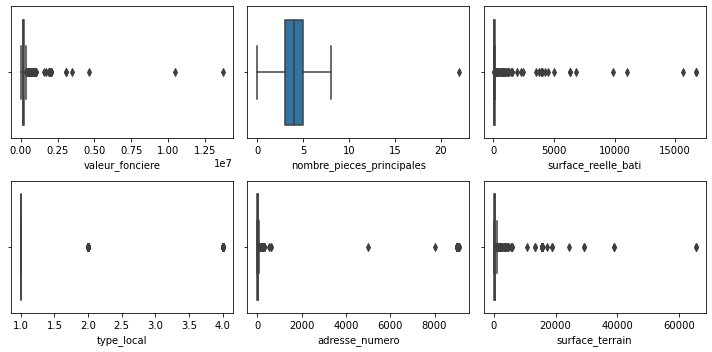

In [26]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['type_local']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['adresse_numero']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

- Pour le nombre de pieces principales , on a une seul outlier :

In [27]:
Q1 = pd.to_numeric(df_concat_1['nombre_pieces_principales']).quantile(0.25)
Q3 = pd.to_numeric(df_concat_1['nombre_pieces_principales']).quantile(0.75)
IQR = Q3 - Q1
df_concat_1 = df_concat_1[(pd.to_numeric(df_concat_1['nombre_pieces_principales']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat_1['nombre_pieces_principales']) <= Q3 + 1.5*IQR)]

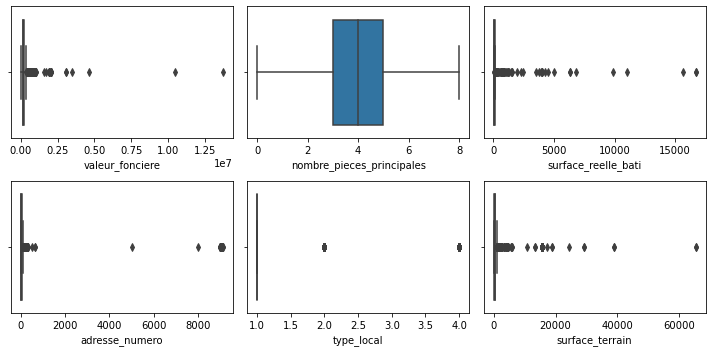

In [28]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['adresse_numero']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['type_local']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

- Pour les valeur_fonciere  :

In [29]:
Q1 = pd.to_numeric(df_concat_1['valeur_fonciere']).quantile(0.25)
Q3 = pd.to_numeric(df_concat_1['valeur_fonciere']).quantile(0.75)
IQR = Q3 - Q1
df_concat_1 = df_concat_1[(pd.to_numeric(df_concat_1['valeur_fonciere']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat_1['valeur_fonciere']) <= Q3 + 1.5*IQR)]


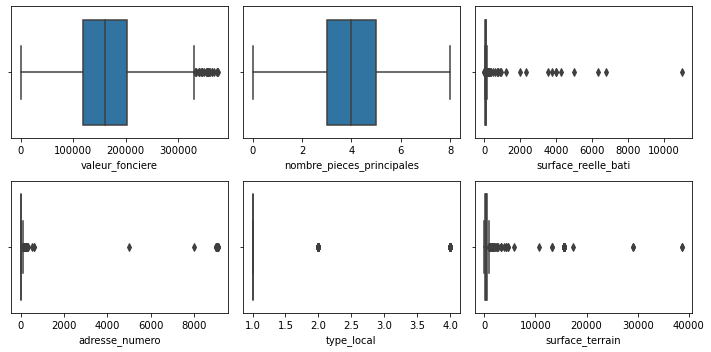

In [30]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['adresse_numero']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['type_local']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

- Pour la surface réel du batiment  :

In [31]:
Q1 = pd.to_numeric(df_concat_1['surface_reelle_bati']).quantile(0.25)
Q3 = pd.to_numeric(df_concat_1['surface_reelle_bati']).quantile(0.75)
IQR = Q3 - Q1
df_concat_1= df_concat_1[(pd.to_numeric(df_concat_1['surface_reelle_bati']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat_1['surface_reelle_bati']) <= Q3 + 1.5*IQR)]

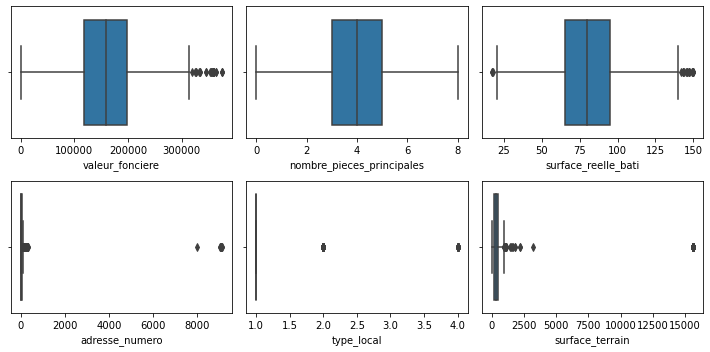

In [32]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['adresse_numero']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['type_local']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

- Pour la surface du terrain :

In [33]:
Q1 = pd.to_numeric(df_concat_1['surface_terrain']).quantile(0.25)
Q3 = pd.to_numeric(df_concat_1['surface_terrain']).quantile(0.75)
IQR = Q3 - Q1
df_concat_1 = df_concat_1[(pd.to_numeric(df_concat_1['surface_terrain']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat_1['surface_terrain']) <= Q3 + 1.5*IQR)]

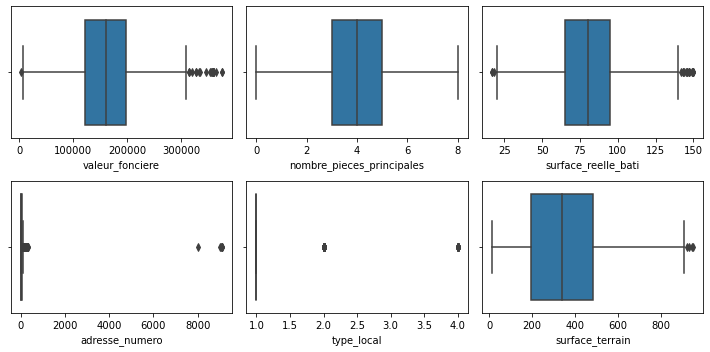

In [34]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['adresse_numero']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['type_local']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

- Pour l'adresse_numero

In [35]:
Q1 = pd.to_numeric(df_concat_1['adresse_numero']).quantile(0.25)
Q3 = pd.to_numeric(df_concat_1['adresse_numero']).quantile(0.75)
IQR = Q3 - Q1
df_concat_1 = df_concat_1[(pd.to_numeric(df_concat_1['adresse_numero']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat_1['adresse_numero']) <= Q3 + 1.5*IQR)]

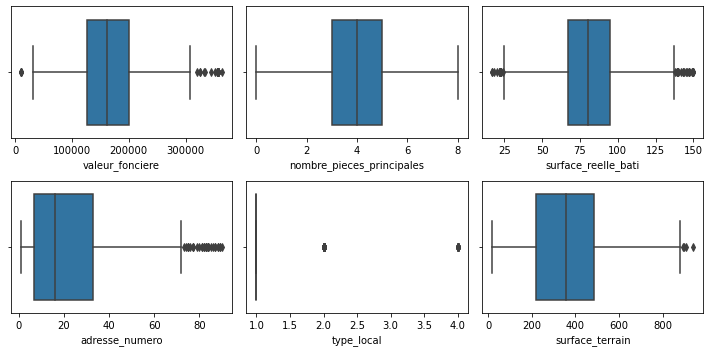

In [36]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['adresse_numero']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['type_local']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

- Pour les type de local

In [37]:
Q1 = pd.to_numeric(df_concat_1['adresse_numero']).quantile(0.25)
Q3 = pd.to_numeric(df_concat_1['adresse_numero']).quantile(0.75)
IQR = Q3 - Q1
df_concat_1 = df_concat_1[(pd.to_numeric(df_concat_1['adresse_numero']) >= Q1 - 1.5*IQR) & (pd.to_numeric(df_concat_1['adresse_numero']) <= Q3 + 1.5*IQR)]

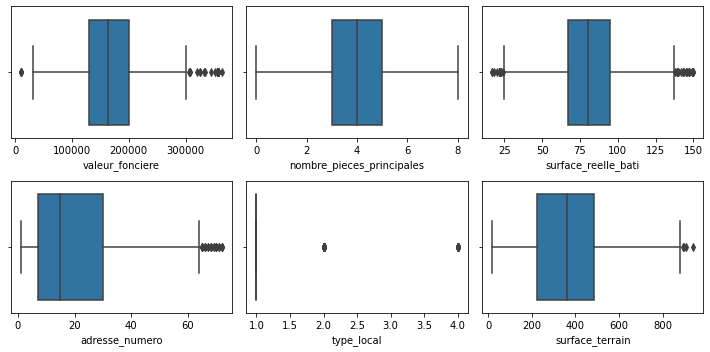

In [38]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['valeur_fonciere']), ax = axs[0,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['nombre_pieces_principales']), ax = axs[0,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_reelle_bati']), ax = axs[0,2])
plt1 = sns.boxplot(x=pd.to_numeric(df_concat_1['adresse_numero']), ax = axs[1,0])
plt2 = sns.boxplot(x=pd.to_numeric(df_concat_1['type_local']), ax = axs[1,1])
plt3 = sns.boxplot(x=pd.to_numeric(df_concat_1['surface_terrain']), ax = axs[1,2])

plt.tight_layout()

##Les données apres cleaning et reduction de dimention

In [39]:
df_concat

,valeur_fonciere,adresse_numero,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
0,260000.0,26.0,1.0,129.0,4.0,351.0
1,160000.0,13.0,1.0,64.0,4.0,452.0
2,174000.0,21.0,1.0,64.0,4.0,498.0
3,200000.0,2.0,2.0,18.0,1.0,105.0
4,200000.0,2.0,4.0,68.0,0.0,105.0
...,...,...,...,...,...,...
1325,56460.0,620.0,4.0,919.0,0.0,29103.0
1326,56460.0,620.0,4.0,11002.0,0.0,29103.0
1327,1000000.0,9010.0,2.0,87.0,3.0,3973.0
1328,1000000.0,9010.0,4.0,1048.0,0.0,3973.0


### 4- Visualisation des données 

Le but de cette partie est d'abord comprendre les données , mais aussi trouver si une caractéristique influence directement le prix des maisons .

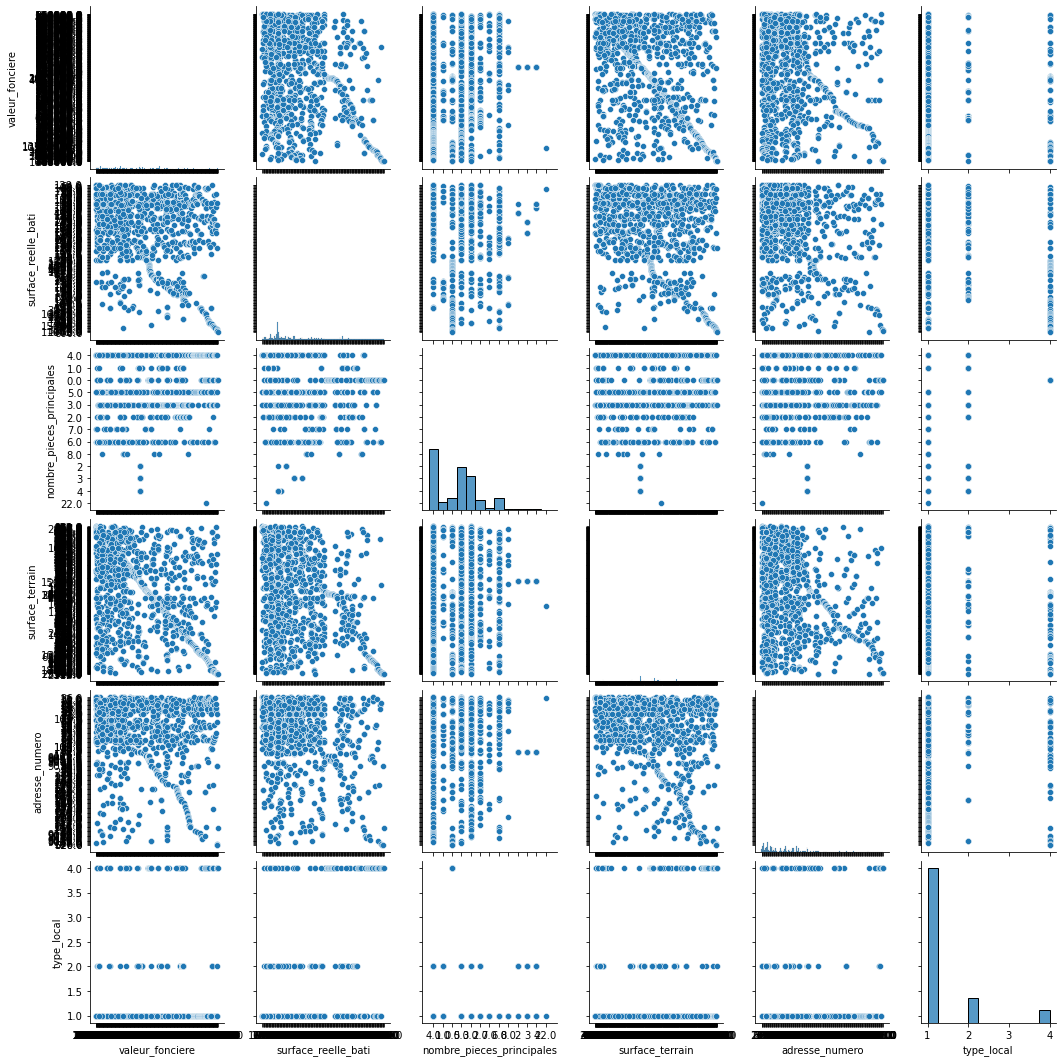

In [40]:
sns.pairplot(df_concat, vars=["valeur_fonciere","surface_reelle_bati","nombre_pieces_principales","surface_terrain", "adresse_numero","type_local"])
plt.show()

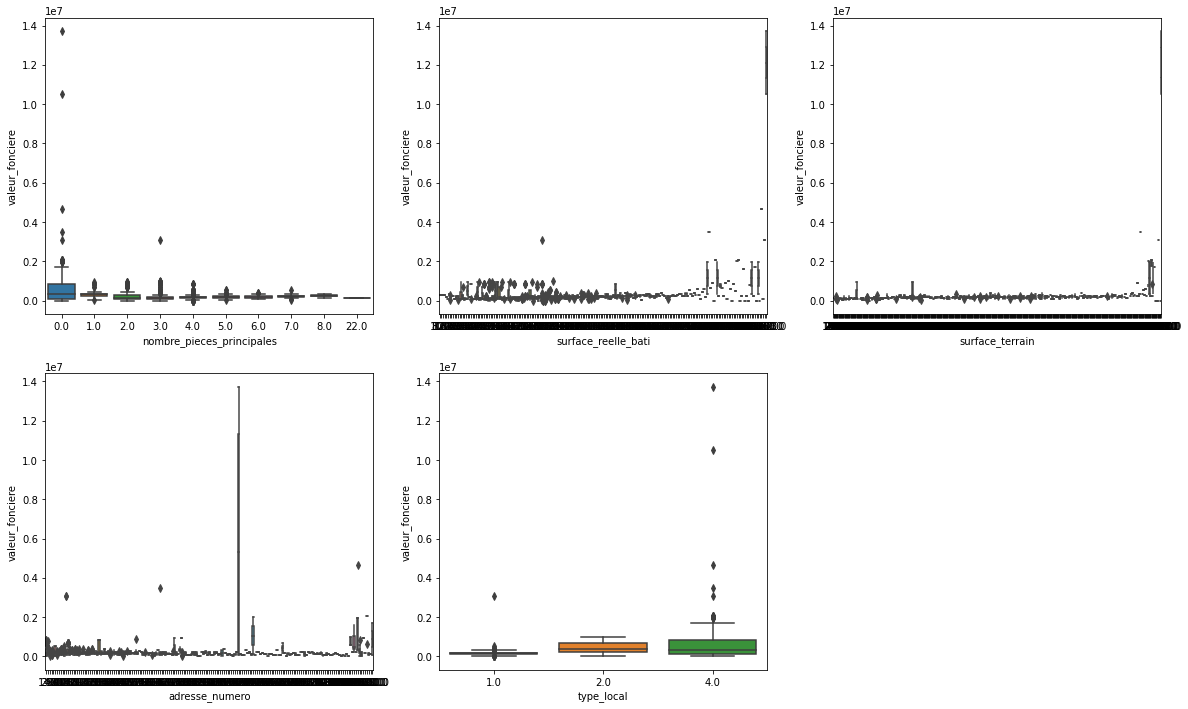

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = pd.to_numeric(df_concat['nombre_pieces_principales']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.subplot(2,3,2)
sns.boxplot(x = pd.to_numeric(df_concat['surface_reelle_bati']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.subplot(2,3,3)
sns.boxplot(x = pd.to_numeric(df_concat['surface_terrain']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.subplot(2,3,4)
sns.boxplot(x = pd.to_numeric(df_concat['adresse_numero']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.subplot(2,3,5)
sns.boxplot(x = pd.to_numeric(df_concat['type_local']), y = pd.to_numeric(df_concat['valeur_fonciere']))
plt.show()

In [42]:
df_concat=df_concat.reset_index(drop=True)

df_concat

,valeur_fonciere,adresse_numero,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
0,260000.0,26.0,1.0,129.0,4.0,351.0
1,160000.0,13.0,1.0,64.0,4.0,452.0
2,174000.0,21.0,1.0,64.0,4.0,498.0
3,200000.0,2.0,2.0,18.0,1.0,105.0
4,200000.0,2.0,4.0,68.0,0.0,105.0
...,...,...,...,...,...,...
1325,56460.0,620.0,4.0,919.0,0.0,29103.0
1326,56460.0,620.0,4.0,11002.0,0.0,29103.0
1327,1000000.0,9010.0,2.0,87.0,3.0,3973.0
1328,1000000.0,9010.0,4.0,1048.0,0.0,3973.0


### 5- Séparation des données en train et test

In [43]:
np.random.seed(0)
df_train, df_test = train_test_split(df_concat, train_size = 0.7, test_size = 0.3,random_state = 100)

### 6- Normalization des données

Le but de cette partie est de s'assurer que les coefficient obtenu sont dans le meme scale

In [44]:
### before scalling
df_train.describe()

,type_local
count,930.000000
mean,1.324731
std,0.783255
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [45]:
scaler = MinMaxScaler()
carac = ['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'adresse_numero','type_local']

df_train[carac] = scaler.fit_transform(df_train[carac])
df_test[carac] = scaler.fit_transform(df_test[carac])


In [46]:
### after scalling
df_train.describe()

,valeur_fonciere,adresse_numero,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,0.024143,0.044165,0.108244,0.012085,0.170430,0.019010
std,0.045241,0.195865,0.261085,0.060619,0.076953,0.064065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011905,0.000659,0.000000,0.003301,0.136364,0.003207
50%,0.016145,0.001866,0.000000,0.004201,0.181818,0.005701
75%,0.021752,0.004391,0.000000,0.005386,0.227273,0.008160
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


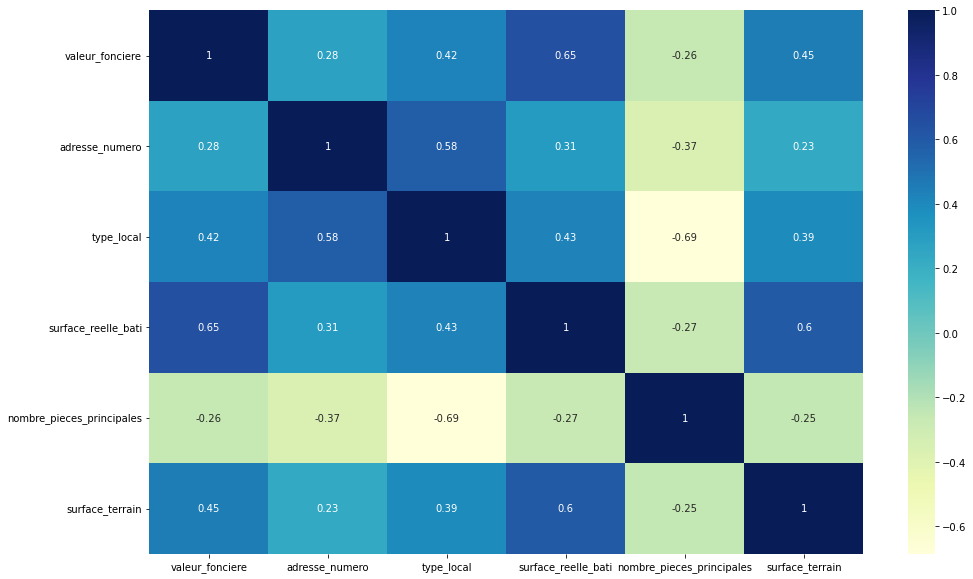

In [47]:
###Check the correlation between the caracteristiques
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- On remarque que la surface reel du batiment  est la plus correler avec la valeur fonciere

### 7-création de modéle

- En utilisant  la normalisation

In [48]:
### diviser les données 
y_train = df_train.pop('valeur_fonciere')
X_train = df_train

In [49]:
y_test = df_test.pop('valeur_fonciere')
X_test = df_test

In [50]:
###Modele utilisé :  LinearRegression et RFE de scikit learn(Recursive feature elimination)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
lm.coef_

array([-0.00085261,  0.03195015,  0.39939626,  0.01361961,  0.04778845])

In [52]:
lm.intercept_

0.012666316544472105

In [53]:
L= s.OLS(y_train,X_train).fit()   # Running the linear model
print(L.summary())

                                 OLS Regression Results                                
Dep. Variable:        valeur_fonciere   R-squared (uncentered):                   0.566
Model:                            OLS   Adj. R-squared (uncentered):              0.564
Method:                 Least Squares   F-statistic:                              241.2
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                   7.66e-165
Time:                        23:56:22   Log-Likelihood:                          1831.3
No. Observations:                 930   AIC:                                     -3653.
Df Residuals:                     925   BIC:                                     -3629.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [54]:
y_pred = lm.predict(X_test)

In [55]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6105932724095269

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

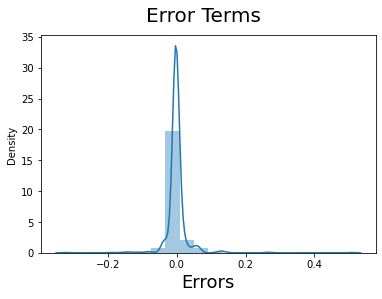

In [56]:
### On check les erreurs
y_train_price = lm.predict(X_train)
res = (y_train_price - y_train)
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

- Conclusion

Prix de maison normalisé = -0.00085261*adresse_numero + 0.03195015*Type_local + 0.39939626*surface_reelle_bati + 0.01361961*nombre_pieces_principales +0.04778845*surface_terrain + 0.012666316544472105 

### Evaluation

Text(0, 0.5, 'y_pred')

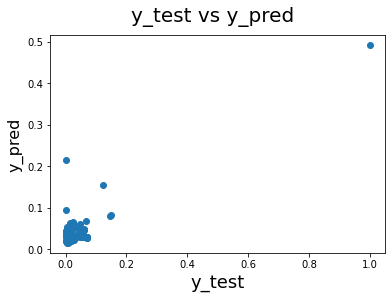

In [57]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

 - Sans utilisation de la normalisation

In [58]:
np.random.seed(0)
df_train2, df_test2= train_test_split(df_concat, train_size = 0.7, test_size = 0.3,random_state = 100)

In [59]:
### diviser les données 
y_train = df_train2.pop('valeur_fonciere')
X_train = df_train2

In [60]:
y_test = df_test2.pop('valeur_fonciere')
X_test = df_test2

In [61]:
###Modele utilisé :  LinearRegression et RFE de scikit learn(Recursive feature elimination)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
lm.coef_

array([-9.82807607e-01,  1.11825498e+05,  2.51674988e+02,  6.50026996e+03,
        7.70036152e+00])

In [63]:
lm.intercept_

18548.241201192286

In [64]:
y_pred = lm.predict(X_test)

In [65]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.542045003949271

Prix de maison  = -9.82807607e-01*adresse_numero + 1.11825498e+05*Type_local + 2.51674988e+02*surface_reelle_bati + 6.50026996e+03*nombre_pieces_principales +7.70036152e*surface_terrain + 18548.241201192286 